# Steps:

* Reading, understanding and visualising the data.
* Preparing the data for modeling.
* Training the model.
* Residual analysis.
* Prediction and evaluation on test set.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Importing day.csv
sharing = pd.read_csv('day.csv')
sharing.head()

sharing_original = sharing;

In [ ]:
# check if there is any null value column
sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
sharing.describe()

# check the shape
print(sharing.shape)

(730, 16)


# [Data Cleaning] **Delete columns not needed for analysis**


In [ ]:
# dteday only contains date, which is not needed for analysis
sharing.drop(['dteday'], axis = 1, inplace = True)

# instant value is serial no. of the data
sharing.drop(['instant'], axis = 1, inplace = True)

# casual & registered
sharing.drop(['registered'], axis = 1, inplace = True)
sharing.drop(['casual'], axis = 1, inplace = True)

**Data Preparation**

In [ ]:
sharing['season'] = sharing['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'});

In [ ]:
sharing['mnth'] = sharing['mnth'].map({1: 'jan', 2: 'feb', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'});


In [ ]:
sharing['weekday'] = sharing['weekday'].map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thurs', 5: 'fri', 6: 'sat'});

In [ ]:
sharing['weathersit'] = sharing['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light', 4: 'rain'});


**Data Validation**

If conversion is done properly

In [ ]:
sharing['season'].astype('category').value_counts()

mon      105
sat      105
sun      105
fri      104
thurs    104
tue      104
wed      103
Name: weekday, dtype: int64

In [ ]:
sharing['mnth'].astype('category').value_counts()

In [ ]:
sharing['weekday'].astype('category').value_counts()

In [ ]:
sharing['weathersit'].astype('category').value_counts()

# Dummy Variable

Following are categorical variables:

1. mnth
2. weekday
3. season
4. weathersit




In [ ]:
# Converting the categorical variables to dummy variables. As dummy variables are n - 1, 
# where n is number of level in one particular categorical variable. Hence, we will be dropping the first column

sharing['season']=sharing['season'].astype('category')
sharing['weathersit']=sharing['weathersit'].astype('category')
sharing['mnth']=sharing['mnth'].astype('category')
sharing['weekday']=sharing['weekday'].astype('category')

sharing = pd.get_dummies(sharing, drop_first=True)

sharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_march', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thurs',
       'weekday_tue', 'weekday_wed', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

**Splitting the Data into Training and Testing Sets**


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

**Check whether the cnt variable (target variable) has any linear relationship with any of the other numerical variable or not. 
To ensure linear regression make sense or**

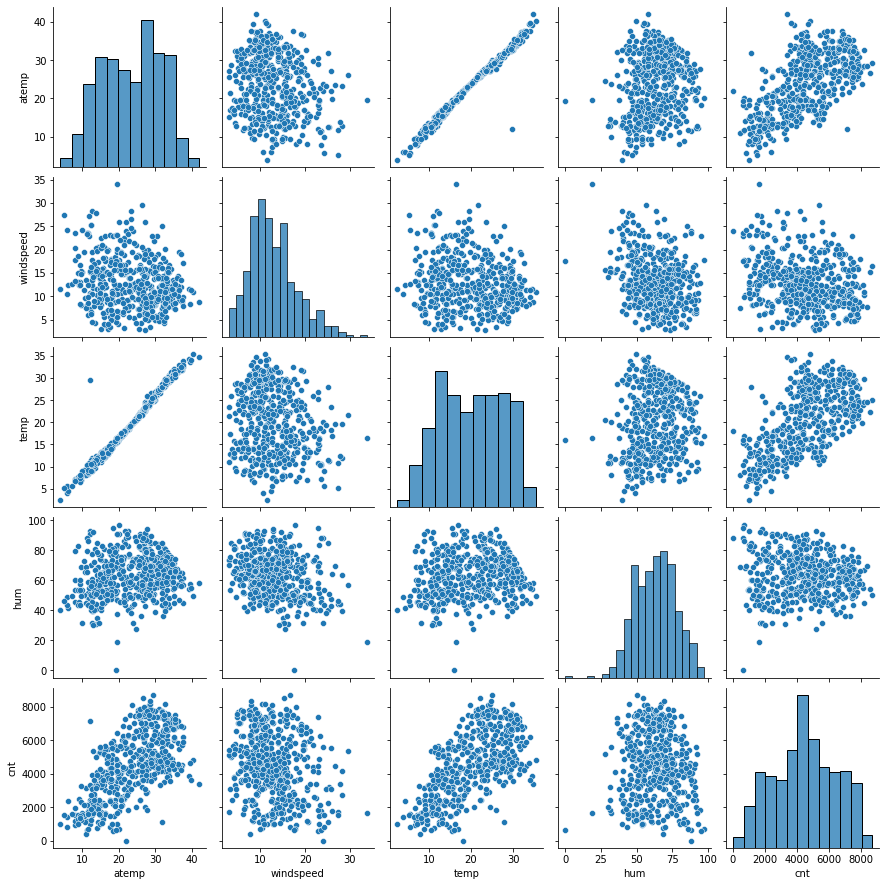

In [ ]:
sharing_numerical = df_train[[ 'atemp', 'windspeed', 'temp', 'hum','cnt']]
sns.pairplot(sharing_numerical)
plt.show()

Above graph shows cnt variable has a linear form with atemp and temp.

# **Visualize the categorical variable**


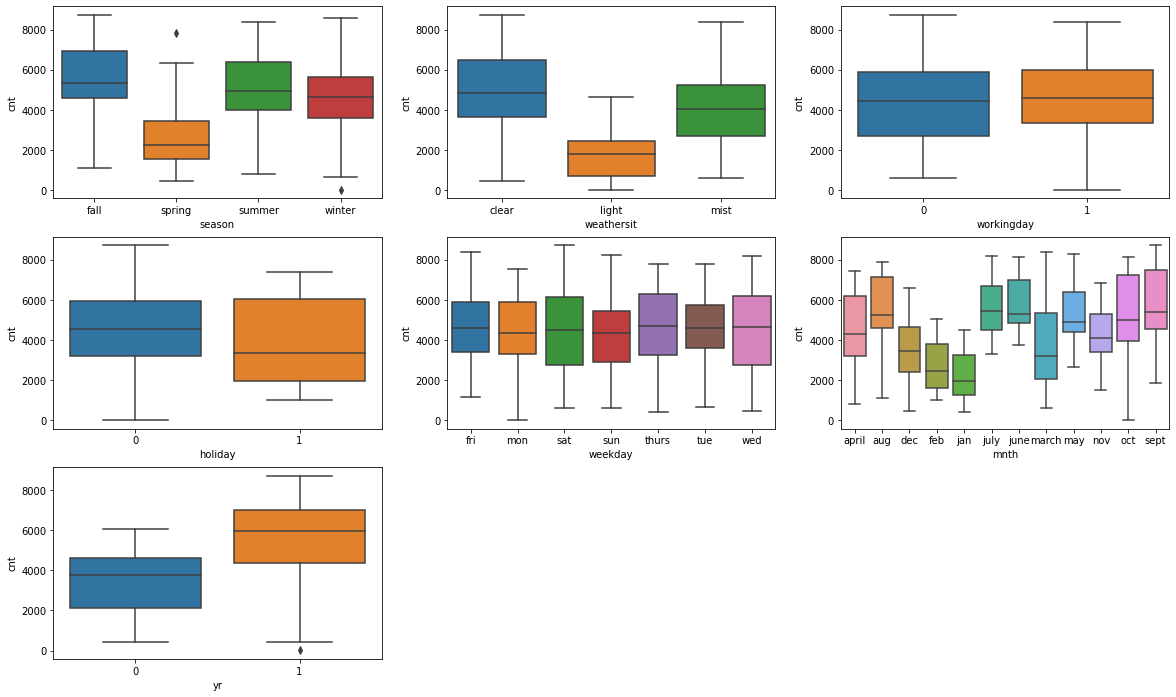

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x="season", y="cnt", data=sharing_original)
plt.subplot(3,3,2)
sns.boxplot(x="weathersit", y="cnt", data=sharing_original)
plt.subplot(3,3,3)
sns.boxplot(x="workingday", y="cnt", data=sharing_original)
plt.subplot(3,3,4)
sns.boxplot(x="holiday", y="cnt", data=sharing_original)
plt.subplot(3,3,5)
sns.boxplot(x="weekday", y="cnt", data=sharing_original)
plt.subplot(3,3,6)
sns.boxplot(x="mnth", y="cnt", data=sharing_original)
plt.subplot(3,3,7)
sns.boxplot(x="yr", y="cnt", data=sharing_original)
plt.show()


**Analysis**

1. Median of bookings happened in season fall is 5000.
2. Bike booking are done when weather is Clear, Few clouds, Partly cloudy, Partly cloudy - with median of 5000.
3. In 2019 has max number of bike booking done. 50% booking done in 2019 is 6000.

**Correlation matrix**

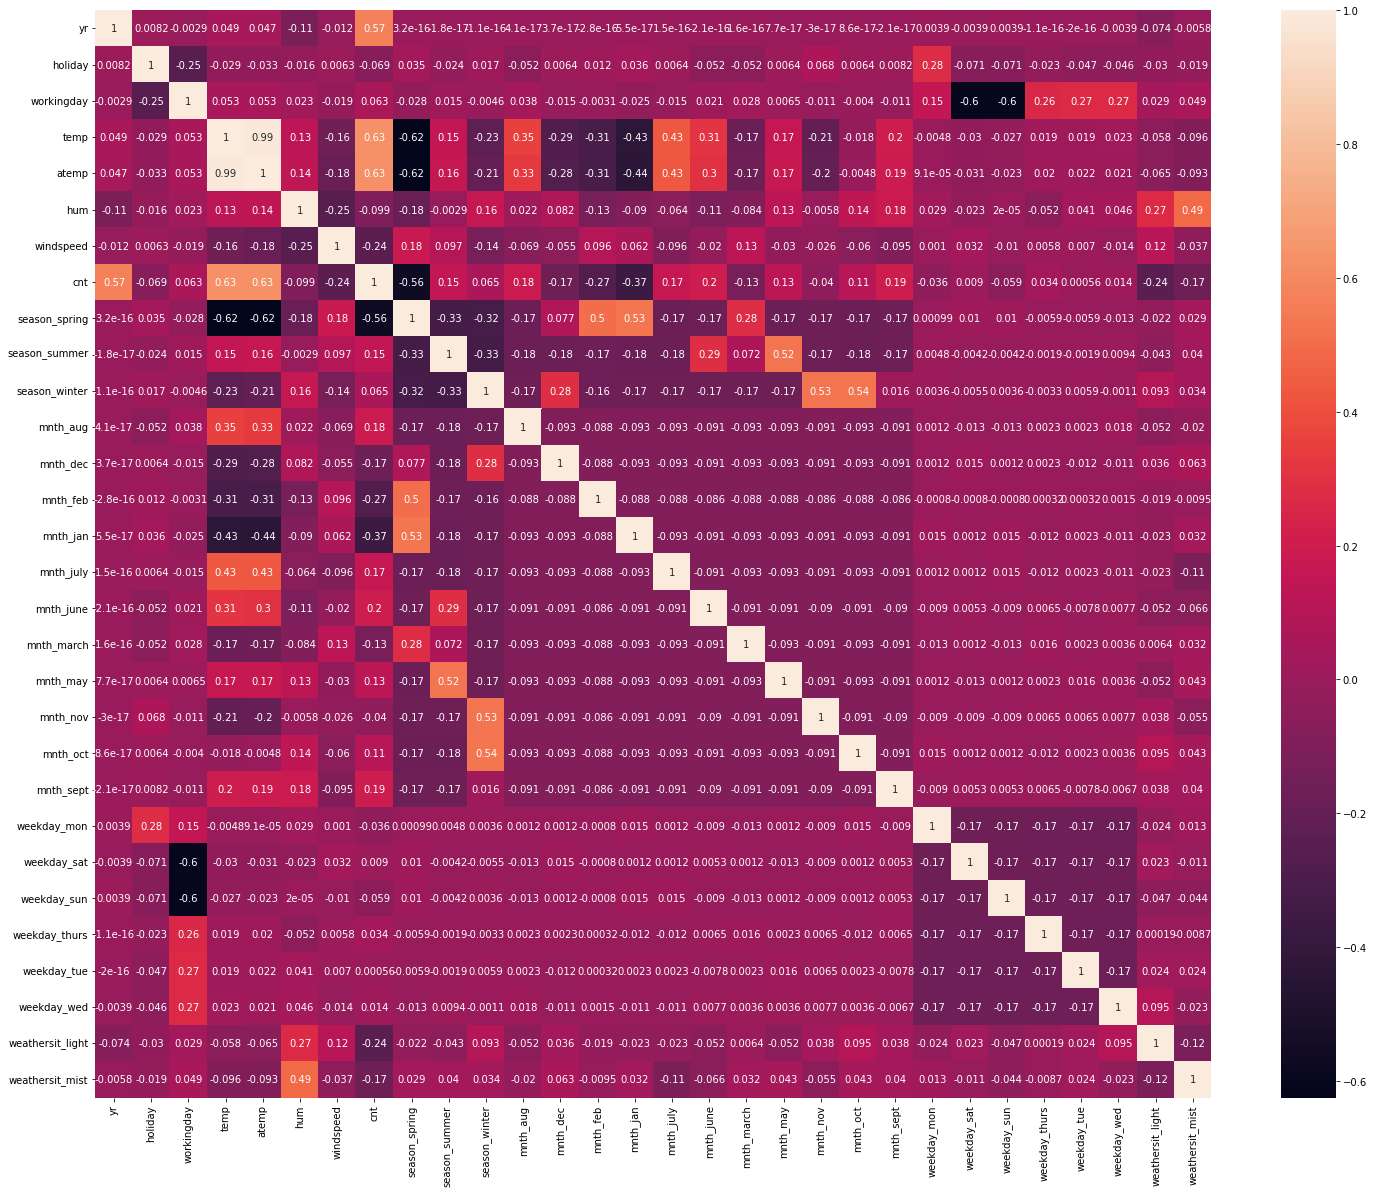

In [ ]:
plt.figure(figsize = (25,20))
sns.heatmap(sharing.corr(), annot = True)
plt.show()

1. temp and atemp has highest correlation coeff of 0.63.

**Rescaling the Features**

In [ ]:
# Rescaling the numerical features to bring all the columns togethter.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ["atemp", "temp", "hum", "windspeed", 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_light,weathersit_mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


# **Linear Model**

In [ ]:
y_train = df_train.pop('cnt')
X_train = df_train

# RFE

Not possible to manually eliminate the columns, hence using RFE to select the strong columns

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15,step=1)         # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_july', True, 1),
 ('mnth_june', False, 14),
 ('mnth_march', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thurs', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_light', True, 1),
 ('weathersit_mist', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_july',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_light',
       'weathersit_mist'],
      dtype='object')

In [ ]:
X_train_rfe = X_train[col]

**Building model using statsmodel, for the detailed statistics**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.69
11,weekday_sat,12.20
12,weekday_sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.61
4,hum,1.91
14,weathersit_mist,1.57


In [ ]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
lr1.params

const               0.198900
yr                  0.229738
holiday            -0.018955
workingday          0.083695
temp                0.527819
hum                -0.159467
windspeed          -0.180601
season_spring      -0.055434
season_summer       0.052613
season_winter       0.100294
mnth_july          -0.054881
mnth_sept           0.081773
weekday_sat         0.093682
weekday_sun         0.040479
weathersit_light   -0.246332
weathersit_mist    -0.057847
dtype: float64

In [ ]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.13e-191
Time:                        18:10:47   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1989      0.028  

In [ ]:
# workingday has high VIF value out of other columns, 
# hence removing it considering it has high multicolinearity with different independent variables

X_train_new = X_train_rfe.drop(["workingday"], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.28
2,temp,16.06
4,windspeed,4.68
5,season_spring,4.03
7,season_winter,3.37
6,season_summer,2.78
13,weathersit_mist,2.30
0,yr,2.08
8,mnth_july,1.59
9,mnth_sept,1.39


In [ ]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.params

const               0.282595
yr                  0.229738
holiday            -0.102650
temp                0.527819
hum                -0.159467
windspeed          -0.180601
season_spring      -0.055434
season_summer       0.052613
season_winter       0.100294
mnth_july          -0.054881
mnth_sept           0.081773
weekday_sat         0.009987
weekday_sun        -0.043216
weathersit_light   -0.246332
weathersit_mist    -0.057847
dtype: float64

In [ ]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.13e-191
Time:                        18:10:47   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2826      0.034  

In [ ]:
# hum has high VIF value out of other columns

X_train_new = X_train_new.drop(["hum"], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.18
3,windspeed,4.62
5,season_summer,2.23
4,season_spring,2.13
0,yr,2.07
6,season_winter,1.84
7,mnth_july,1.59
12,weathersit_mist,1.55
8,mnth_sept,1.34
9,weekday_sat,1.23


In [ ]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.params

const               0.203927
yr                  0.233626
holiday            -0.103407
temp                0.492017
windspeed          -0.149124
season_spring      -0.065288
season_summer       0.046496
season_winter       0.085870
mnth_july          -0.049971
mnth_sept           0.075781
weekday_sat         0.011749
weekday_sun        -0.046259
weathersit_light   -0.290444
weathersit_mist    -0.083515
dtype: float64

In [ ]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          5.73e-189
Time:                        18:10:47   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2039      0.029  

In [ ]:
# temp has high VIF more than 5 value, hence removing it.

X_train_new = X_train_new.drop(["temp"], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.88
3,season_spring,2.11
4,season_summer,2.03
0,yr,1.83
5,season_winter,1.81
11,weathersit_mist,1.51
8,weekday_sat,1.22
6,mnth_july,1.21
9,weekday_sun,1.20
7,mnth_sept,1.16


In [ ]:
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.params

const               0.589700
yr                  0.247225
holiday            -0.107400
windspeed          -0.171327
season_spring      -0.298947
season_summer      -0.045134
season_winter      -0.075192
mnth_july          -0.010395
mnth_sept           0.071636
weekday_sat         0.007449
weekday_sun        -0.047509
weathersit_light   -0.302293
weathersit_mist    -0.092944
dtype: float64

In [ ]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     138.2
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.01e-149
Time:                        18:10:48   Log-Likelihood:                 412.67
No. Observations:                 510   AIC:                            -799.3
Df Residuals:                     497   BIC:                            -744.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5897      0.017  

In [ ]:
# p value of mnth_july is more than 0.005. Hence removing it.

X_train_new = X_train_new.drop(["mnth_july"], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.57
3,season_spring,1.94
4,season_summer,1.86
0,yr,1.78
5,season_winter,1.68
10,weathersit_mist,1.51
7,weekday_sat,1.21
8,weekday_sun,1.19
6,mnth_sept,1.14
9,weathersit_light,1.08


In [ ]:
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.params

const               0.585891
yr                  0.247264
holiday            -0.107212
windspeed          -0.171226
season_spring      -0.295259
season_summer      -0.041452
season_winter      -0.071693
mnth_sept           0.074535
weekday_sat         0.007334
weekday_sun        -0.047774
weathersit_light   -0.302425
weathersit_mist    -0.092613
dtype: float64

In [ ]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.99e-151
Time:                        18:10:48   Log-Likelihood:                 412.55
No. Observations:                 510   AIC:                            -801.1
Df Residuals:                     498   BIC:                            -750.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5859      0.015  

In [ ]:
# weekday_sat, has p value more than 0.005 hence removing it.
X_train_new = X_train_new.drop(["weekday_sat"], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.49
3,season_spring,1.92
4,season_summer,1.86
0,yr,1.78
5,season_winter,1.66
9,weathersit_mist,1.51
7,weekday_sun,1.16
6,mnth_sept,1.14
8,weathersit_light,1.08
1,holiday,1.05


In [ ]:
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
lr6.params

const               0.587019
yr                  0.247088
holiday            -0.108669
windspeed          -0.170448
season_spring      -0.295092
season_summer      -0.041506
season_winter      -0.071465
mnth_sept           0.074532
weekday_sun        -0.049155
weathersit_light   -0.302387
weathersit_mist    -0.092621
dtype: float64

In [ ]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          7.84e-152
Time:                        18:10:48   Log-Likelihood:                 412.40
No. Observations:                 510   AIC:                            -802.8
Df Residuals:                     499   BIC:                            -756.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5870      0.015  

**Residual Analysis Of Training Data**

Text(0.5, 0, 'Errors')

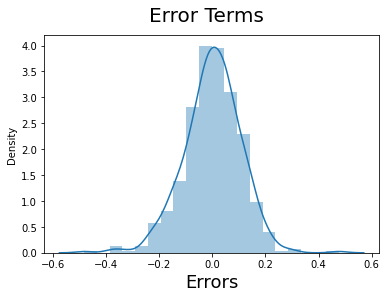

In [ ]:
y_train_pred = lr6.predict(X_train_lm6)

res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        
plt.xlabel('Errors', fontsize = 18) 

From the above graph the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.49
3,season_spring,1.92
4,season_summer,1.86
0,yr,1.78
5,season_winter,1.66
9,weathersit_mist,1.51
7,weekday_sun,1.16
6,mnth_sept,1.14
8,weathersit_light,1.08
1,holiday,1.05


**As all the values of VIF are less than 5, hence there is no multicollinearity b/w the variables**


# Prediction on Test data

In [ ]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                219 non-null    int64  
 1   holiday           219 non-null    int64  
 2   workingday        219 non-null    int64  
 3   temp              219 non-null    float64
 4   atemp             219 non-null    float64
 5   hum               219 non-null    float64
 6   windspeed         219 non-null    float64
 7   season_spring     219 non-null    uint8  
 8   season_summer     219 non-null    uint8  
 9   season_winter     219 non-null    uint8  
 10  mnth_aug          219 non-null    uint8  
 11  mnth_dec          219 non-null    uint8  
 12  mnth_feb          219 non-null    uint8  
 13  mnth_jan          219 non-null    uint8  
 14  mnth_july         219 non-null    uint8  
 15  mnth_june         219 non-null    uint8  
 16  mnth_march        219 non-null    uint8  
 

In [ ]:
col1 = X_train_new.columns
X_test = X_test[col1]

X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             219 non-null    float64
 1   yr                219 non-null    int64  
 2   holiday           219 non-null    int64  
 3   windspeed         219 non-null    float64
 4   season_spring     219 non-null    uint8  
 5   season_summer     219 non-null    uint8  
 6   season_winter     219 non-null    uint8  
 7   mnth_sept         219 non-null    uint8  
 8   weekday_sun       219 non-null    uint8  
 9   weathersit_light  219 non-null    uint8  
 10  weathersit_mist   219 non-null    uint8  
dtypes: float64(2), int64(2), uint8(7)
memory usage: 10.1 KB


In [ ]:
y_pred = lr6.predict(X_test_lm6)

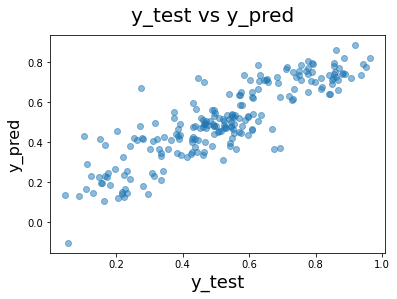

In [ ]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

**R^2 Test**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.748864098803765

In [ ]:
r2 = 0.748864098803765

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7367902574001

# Final Result:


* **Train R^2** : 0.769
* **Train Adjusted R^2** : 0.765
* **Test R^2** : 0.748
* **Test Adjusted R^2** : 0.736

This seems to be a really good model that can be used for prediction.

**Correlation between final predictor variables.**

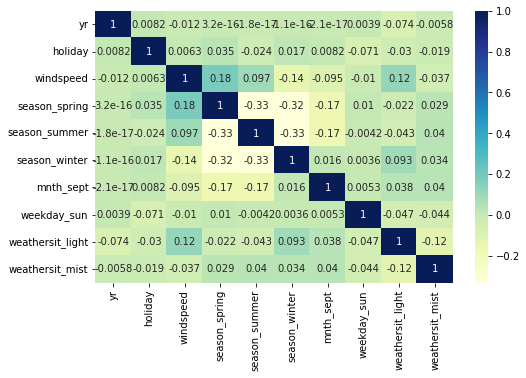

In [ ]:
col2 = X_train_lm6.drop('const', axis = 1).columns
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(sharing[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
lr6.params

const               0.587019
yr                  0.247088
holiday            -0.108669
windspeed          -0.170448
season_spring      -0.295092
season_summer      -0.041506
season_winter      -0.071465
mnth_sept           0.074532
weekday_sun        -0.049155
weathersit_light   -0.302387
weathersit_mist    -0.092621
dtype: float64